## Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

### Name / Data Type / Measurement Unit / Description
1. Sex / nominal / -- / M, F, and I (infant)
2. Length / continuous / mm / Longest shell measurement
3. Diameter / continuous / mm / perpendicular to length
4. Height / continuous / mm / with meat in shell
5. Whole weight / continuous / grams / whole abalone
6. Shucked weight / continuous / grams / weight of meat
7. Viscera weight / continuous / grams / gut weight (after bleeding)
8. Shell weight / continuous / grams / after being dried
9. Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone.

In [677]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [678]:
#importing the dataset
data= pd.read_csv('abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [679]:
#checking any null values in the dataset
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [680]:
#checking duplicate observations 
data.drop_duplicates(inplace=True)
data.shape
#There is no duplicated observation in the dataset

(4177, 9)

In [681]:
#statistical view
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Height column has min value 0 which is not possible. we can tell that height is not filled properly in some observation.

In [682]:
#removing observations whose height is zero
data= data[data.Height>0]
#checking the shape of the data after removing some observation
data.shape

(4175, 9)

Sex column has categorical data. we need to convert them into numerical through encoding

In [683]:
#seeing the number of categories in sex column
data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [684]:
#encoding
from sklearn.preprocessing import LabelEncoder
encode= LabelEncoder()

data['Sex']= encode.fit_transform(data[['Sex']])

In [685]:
#checking the categorical data of the dataset
encode.inverse_transform([0,1,2])

array(['F', 'I', 'M'], dtype=object)

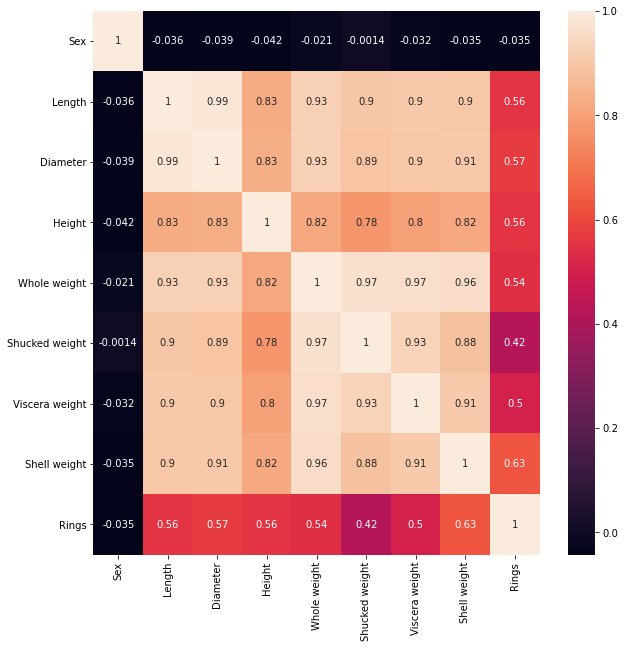

In [686]:
#checking correlation between features and label
plt.figure(figsize=(10,10),facecolor='white')
corr_data= data.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

sex and rings are weakly correlated. so we will reomve that feature. there are many multicollinearity between these variables. lets keep that in mind.

In [687]:
#dropping th column
df= data.drop(columns='Sex')
#spliting the feature and the target variables
x= df.drop(columns='Rings')
y= df.Rings

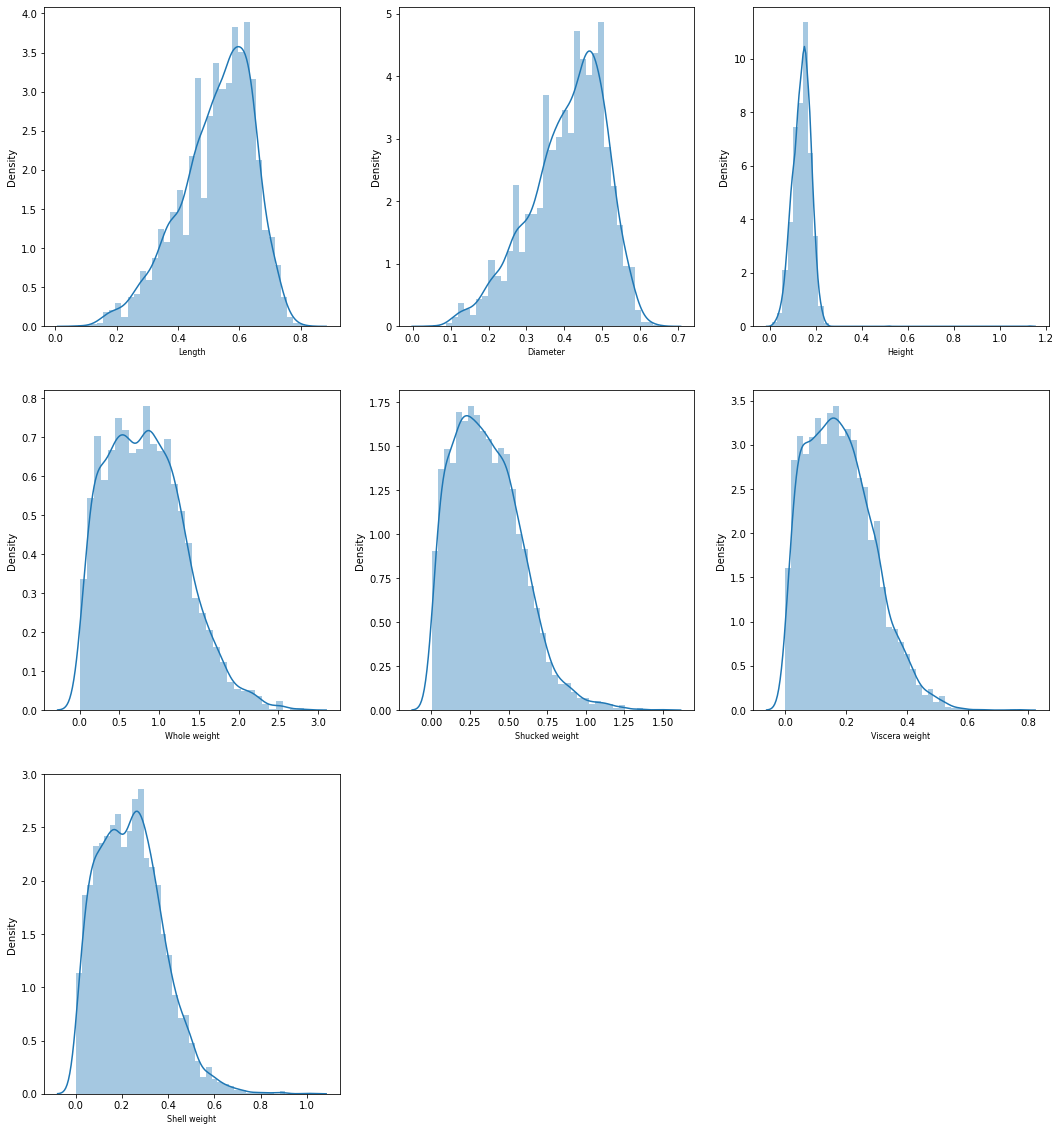

In [688]:
#seeing if there's any skewness or outliers in the dataset
#canva size
plt.figure(figsize=(18,20),facecolor='white')
plotnumber=1

for column in x.columns:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize=8)
    plotnumber+=1
plt.show()

In [689]:
#skew
x.skew()

Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
dtype: float64

There are some skewness in the features and Height feature has the most skew 3.16

In [690]:
#removing the skewness of the dataset
from sklearn.preprocessing import power_transform
transform=power_transform(x)
x= pd.DataFrame(transform,columns=x.columns)

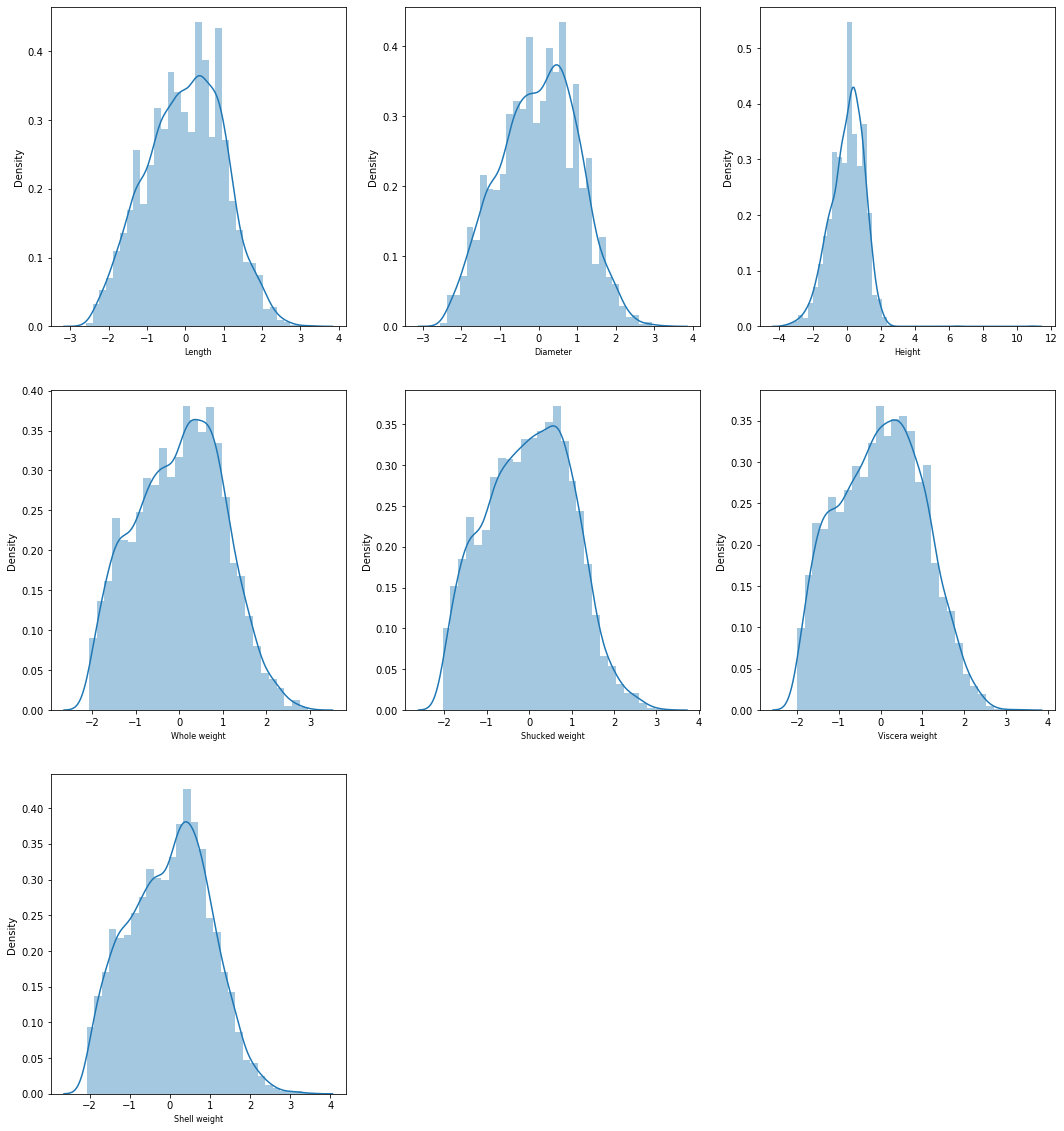

Length           -0.066627
Diameter         -0.065944
Height           -0.113694
Whole weight     -0.004036
Shucked weight    0.027266
Viscera weight    0.039660
Shell weight      0.023378
dtype: float64


In [691]:
#canva size
plt.figure(figsize=(18,20),facecolor='white')
plotnumber=1

for column in x.columns:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize=8)
    plotnumber+=1
plt.show()
print(x.skew())

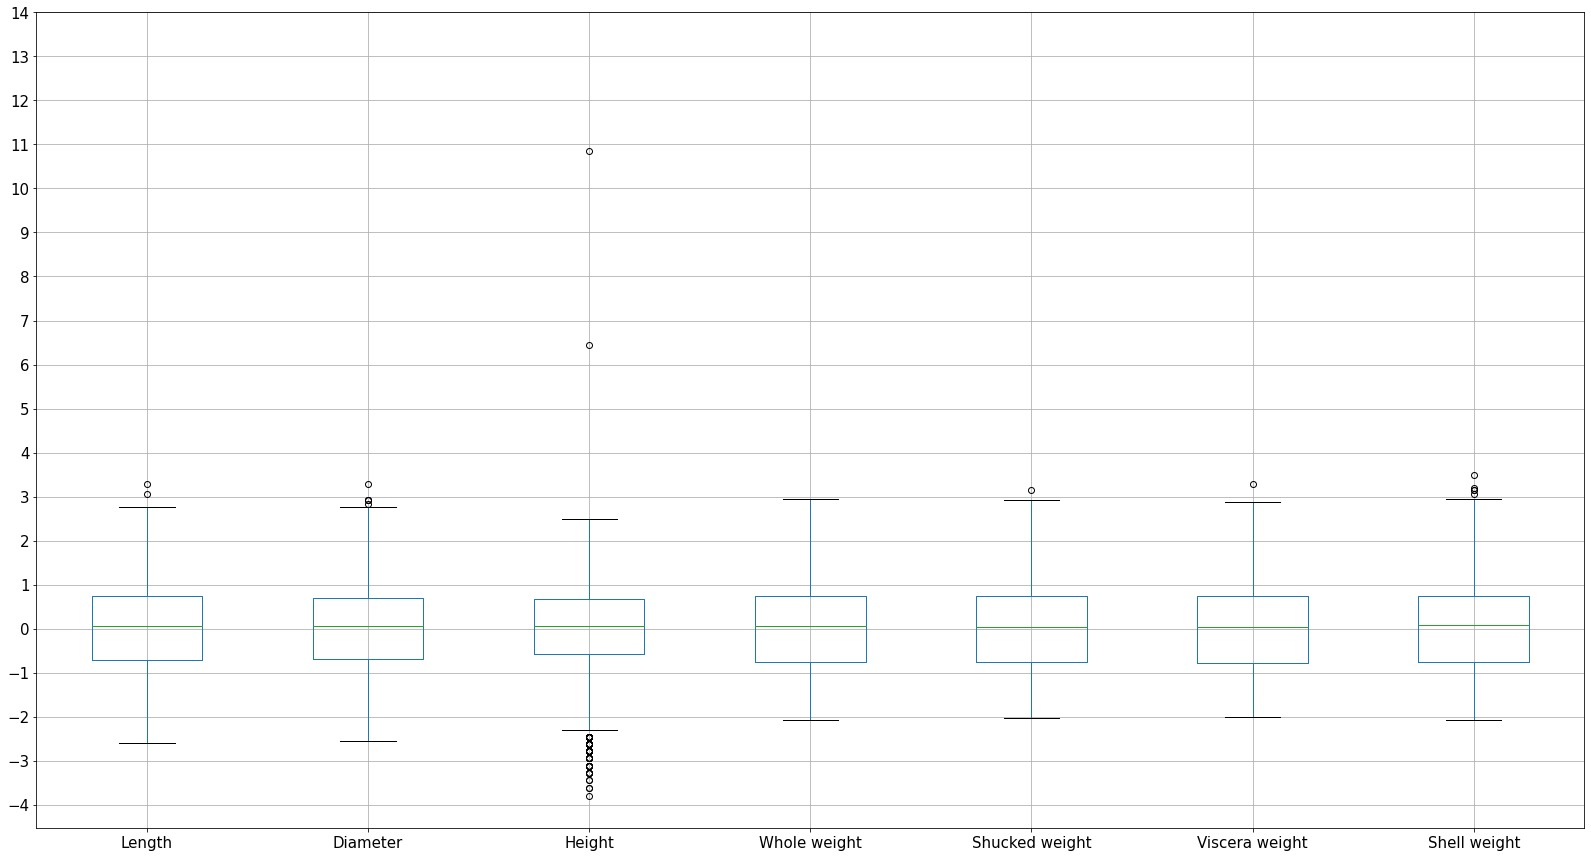

In [692]:
#lets visualize and see if theres any outliers
plt.figure(figsize=(20,15),facecolor='white')
x.boxplot(fontsize=15)
plt.subplots_adjust(right=1.2)
plt.yticks([-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

There are outliers in height, diameter,lenght. lets remove the outliers which are greater than 3 and less than -3.

In [693]:
#joining the standartized data with target
new_data= x.join(y,how='inner')
new_data.shape

(4173, 8)

In [694]:
#droping the outliers
for column in new_data.columns:
    if column=='Rings':
        print(column, "is avoided because its a target variable")
    else:
        new_data.drop(index=new_data[(new_data[column]>3) | (new_data[column]<-3)].index,inplace=True)
new_data.shape

Rings is avoided because its a target variable


(4146, 8)

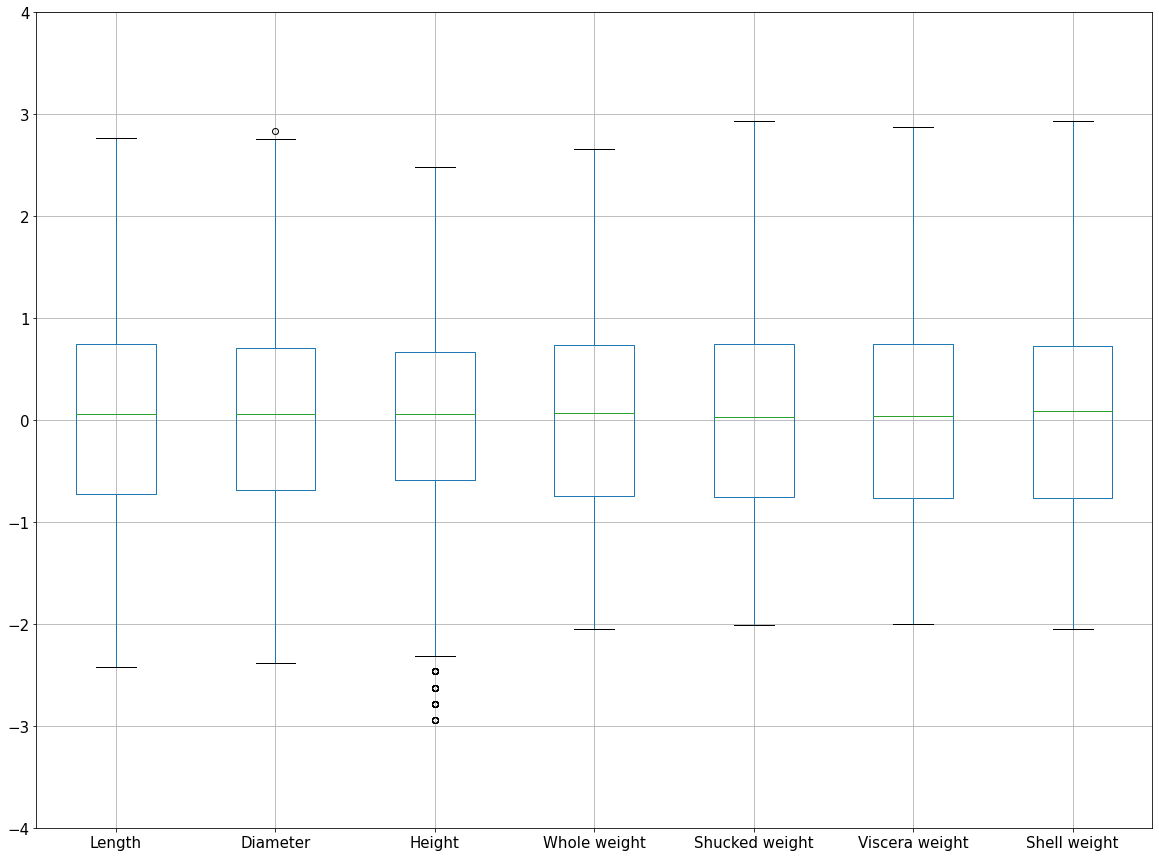

In [695]:
#lets visualize after removing outliers
plt.figure(figsize=(20,15),facecolor='white')
new_data.drop(columns='Rings').boxplot(fontsize=15)
plt.yticks([-4,-3,-2,-1,0,1,2,3,4,])
plt.show()

Outliers are removes from the dataset based on boxplot.

In [696]:
#spliting the feature and the target variables again for model building
x_new= new_data.drop(columns='Rings')
y_new= new_data.Rings

In [697]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.686323,-0.550653,-1.131194,-0.577527,-0.541664,-0.694037,-0.587784
1,-1.397035,-1.388013,-1.272013,-1.352442,-1.312271,-1.333647,-1.332360
2,-0.071544,0.007809,-0.065873,-0.198840,-0.366790,-0.255878,-0.098261
3,-0.798101,-0.550653,-0.322396,-0.572654,-0.592346,-0.548537,-0.544908
4,-1.514441,-1.460315,-1.559080,-1.413814,-1.380799,-1.452433,-1.485462
...,...,...,...,...,...,...,...
4170,0.249143,0.344993,0.667407,0.241279,0.193534,0.639048,0.192993
4171,0.492198,0.229935,-0.065873,0.395074,0.494881,0.432936,0.275196
4172,0.592788,0.644647,1.567425,0.777432,0.837655,1.015166,0.598361
4173,0.852905,0.769433,0.307386,0.633312,0.858264,0.814666,0.519113


In [698]:
dfdgdgadssg

NameError: name 'dfdgdgadssg' is not defined

In [723]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


#finding the best random state
maxscr=0
maxrs=0 
for i in range(1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x_new,y_new,test_size=0.20, random_state=i)
    rf= RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred= rf.predict(x_test)
    score= r2_score(y_test,y_pred)
    if score> maxscr:
        maxscr= score
        maxrs=i
print('Best r2 score:',maxscr, "  Best Random_state",maxrs)

Best r2 score: 0.3865711215853955   Best Random_state 913


Similar best random state test had been conducted for dataset with outliers which has gives 58 value. hence choosing 58 has our random state value.

In [730]:
#splitting the training and testing data based on best random state
x_train,x_test,y_train,y_test= train_test_split(x_new,y_new,test_size=0.2,random_state=58)

In [731]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.29923444642666597
Mean Squared Error 6.634765662650602
Root Mean Squared Error 2.5758038866828743


**Observation**:By removing the outliers our model score drops to 30% with mean squared error of 6.63. even by doing zscore method our model accuracy is same. so, we keep some outliers because the target variable may depend on those observation.

In [732]:
#splitting the training and testing data without removing outliers 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=58)

In [733]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.6190402502632606
Mean Squared Error 4.2080500598802395
Root Mean Squared Error 2.051353226502018


In [734]:
#linear regression model
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5997058119266334
Mean Squared Error 4.42161667539912
Root Mean Squared Error 2.1027640560460226


In [736]:
#support vector regression
from sklearn.svm import SVR

svr= SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5854926733100947
Mean Squared Error 4.578613835460631
Root Mean Squared Error 2.139769575318948


In [737]:
from sklearn.linear_model import Lasso,LassoCV
lss= LassoCV(alphas=None,normalize=True,max_iter=1000)
lss.fit(x_train,y_train)
lasso= Lasso(alpha=lss.alpha_)
lasso.fit(x_train,y_train)
y_pred= lasso.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5996958756855448
Mean Squared Error 4.4217264303008825
Root Mean Squared Error 2.102790153653208


In [739]:
#Gradient Boost Regression
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.6128397258868006
Mean Squared Error 4.276540542120641
Root Mean Squared Error 2.067979821497454


Randomforest, L1 norm, Gradient Boost model has good r2 score and less mean squared error. thus we will conduct cross validation for these model and check the score and see if the model is overfitting

In [742]:
#cross validation
from sklearn.model_selection import cross_val_score

cvr= cross_val_score(rf,x,y,cv=5)
cvr1= cross_val_score(lss,x,y,cv=5)
cvr2= cross_val_score(gbr,x,y,cv=5)
print('Cross validation score of RandomForest model',cvr.mean())
print('Cross validation score of Lasso Regression (L1 norm) model',cvr1.mean())
print('Cross validation score of Gradient Boost  model',cvr2.mean())

Cross validation score of RandomForest model 0.44001299966191815
Cross validation score of Lasso Regression (L1 norm) model 0.43974973380413174
Cross validation score of Gradient Boost  model 0.4483928934876154


Based on the score values Gradient Boost model is choosen as our working model.

In [747]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param= {
    'max_depth': range(4,8,2),
    'learning_rate': np.arange(0.1,1,0.1),
    'min_samples_split':range(4,7,1)
}

search= GridSearchCV(gbr,param_grid=param)
search.fit(x_train,y_train)
gbr= search.best_estimator_
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.6186025854579532
Mean Squared Error 4.212884469319699
Root Mean Squared Error 2.0525312346757842


**The GradientBoostRegressor model gives a R2 Score of 61 percent with mean squared error of 4.21.**